# EDA
The logic of EDA process:
1. **Check the basic situation of the data set**: the data type of each feature, whether there are missing values, outliers
2. **Data visualization**: Visualize the relationship between individual features and y and the relationship between multiple variables and y
3. **Data processing**: Process the data based on the data set, such as converting multi-classification variables to one-hot encoding, binary classification variables to 0-1 encoding, and time variables to time conversion
4. **Data verification**: Ensure that the data is directly available when the model is built

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
import shap

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

## 1 Description of dataset

In [2]:
# load the dataset
df=pd.read_csv('../data/raw/bank/bank-full.csv',sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


The dataset has 45,211 data points and 17 features, and none of the features have missing values.

## 2 Visualisation

### 2.1 individual Feature distribution

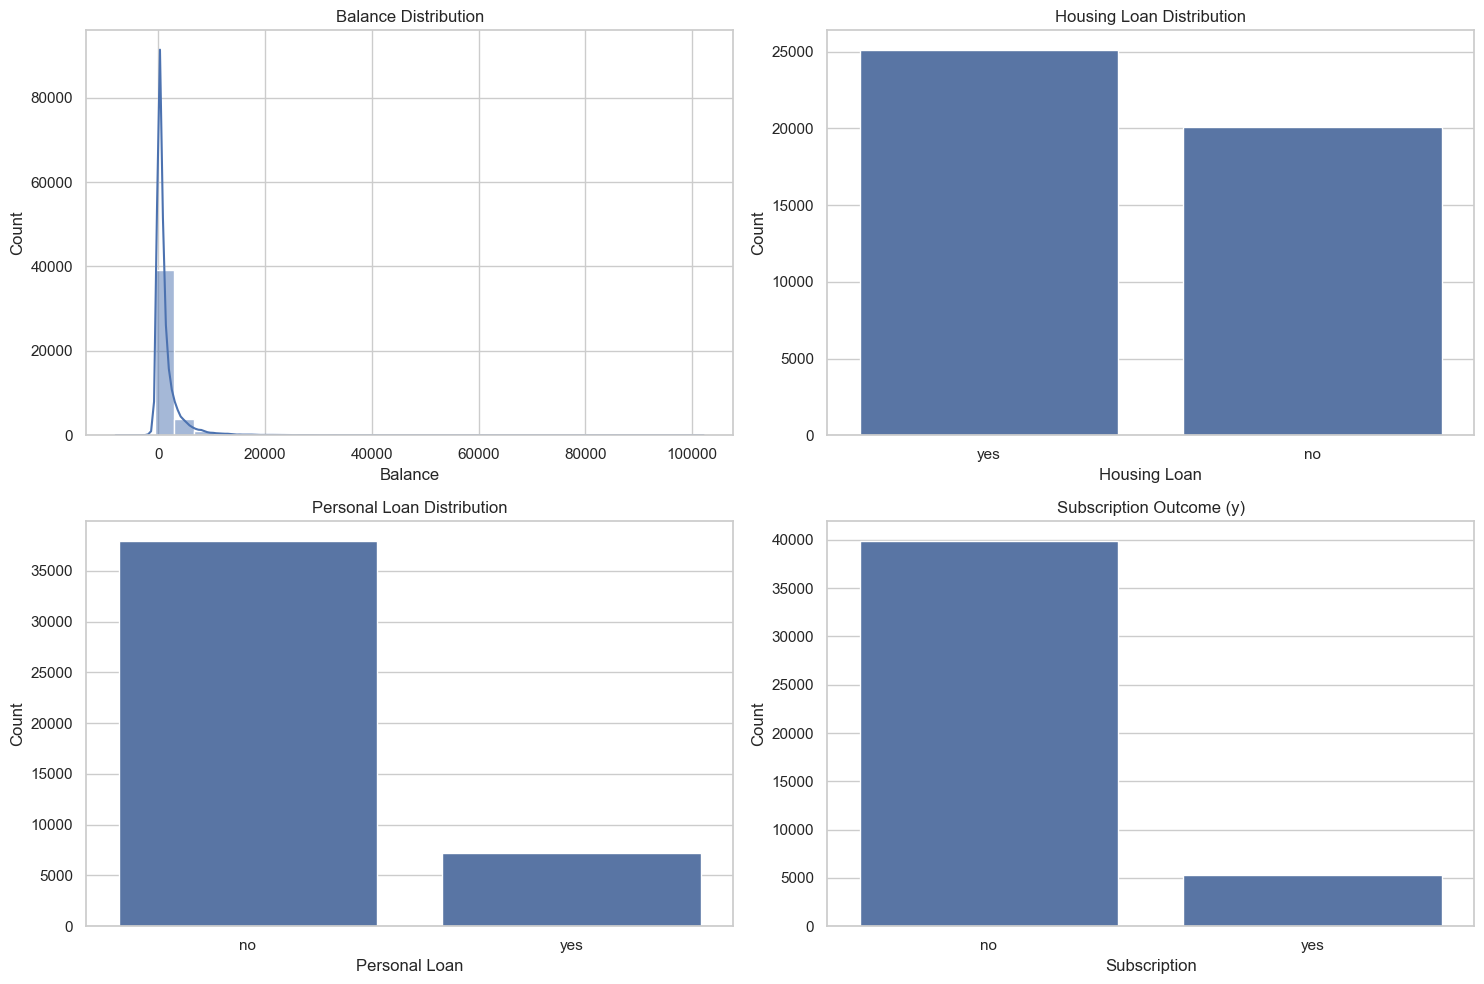

In [6]:
# Create a canvas
plt.figure(figsize=(15, 10))

# Balance distribution
plt.subplot(2, 2, 1)
sns.histplot(df['balance'], bins=30, kde=True)
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Count')

# Housing Loan Distribution
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='housing')
plt.title('Housing Loan Distribution')
plt.xlabel('Housing Loan')
plt.ylabel('Count')

# Personal Loan distribution
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='loan')
plt.title('Personal Loan Distribution')
plt.xlabel('Personal Loan')
plt.ylabel('Count')

# Y (subscribed or not) distribution
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='y')
plt.title('Subscription Outcome (y)')
plt.xlabel('Subscription')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### 2.2 individual feature related to subscription

C:\Users\connell\AppData\Local\Temp\ipykernel_30788\2349259949.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='y', y='balance', palette='pastel')


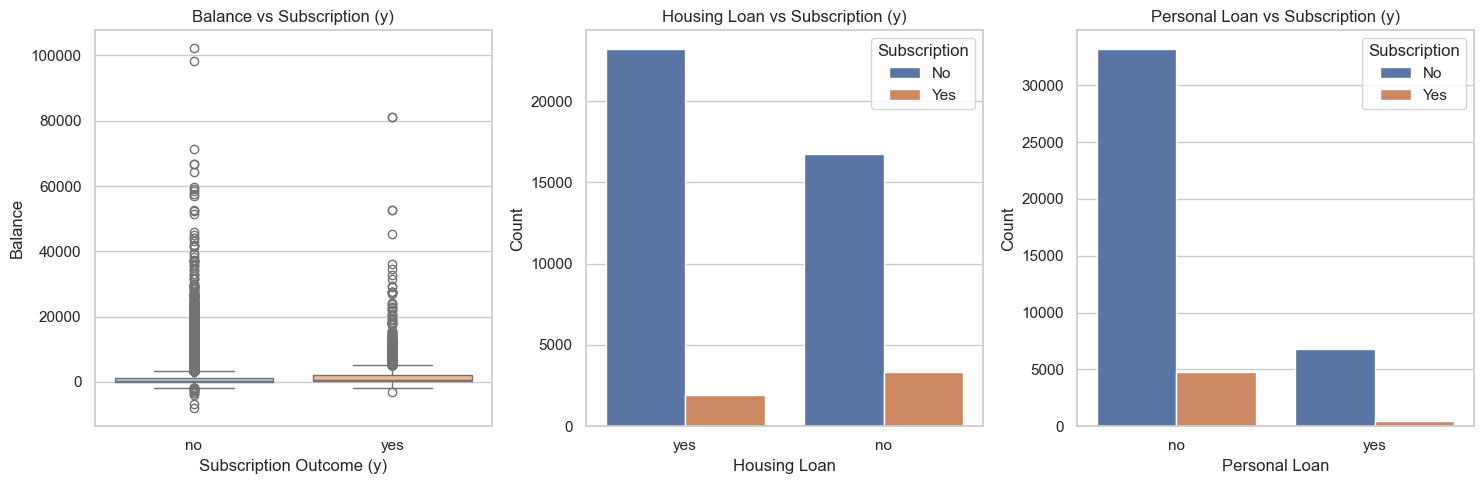

In [ ]:
# Setting the style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))

# Balance vs y (box plot)
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='y', y='balance', palette='pastel')
plt.title('Balance vs Subscription (y)')
plt.xlabel('Subscription Outcome (y)')
plt.ylabel('Balance')

# Housing Loan vs y (grouped bar charts)
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='housing', hue='y')
plt.title('Housing Loan vs Subscription (y)')
plt.xlabel('Housing Loan')
plt.ylabel('Count')
plt.legend(title='Subscription', labels=['No', 'Yes'])

# Personal Loan vs y (grouped bar charts)
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='loan', hue='y')
plt.title('Personal Loan vs Subscription (y)')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.legend(title='Subscription', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

### 2.3 Interaction values with subcription visualisation

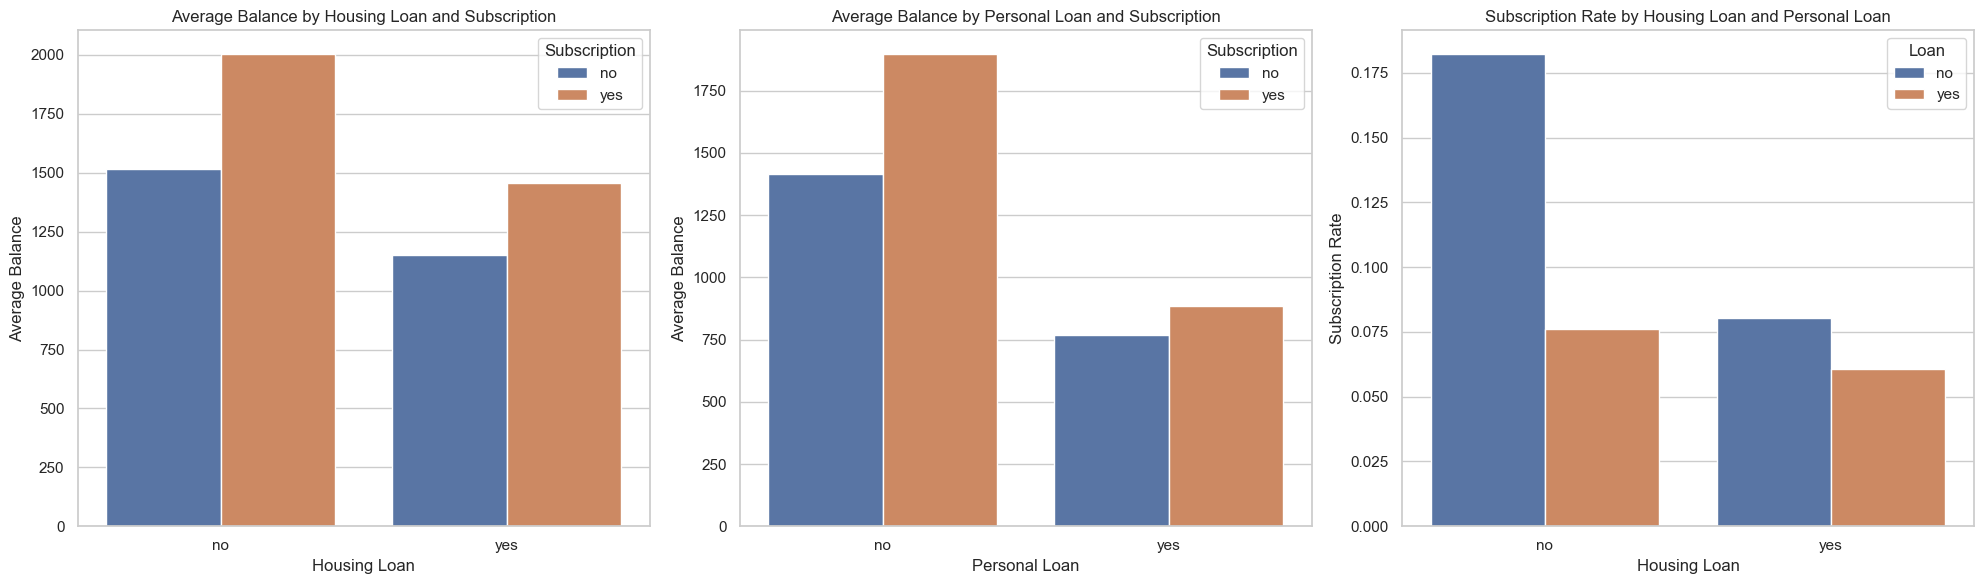

In [ ]:
# Create a subdiagram layout with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# First figure: average account balances for different housing loan profiles and subscription profiles
balance_housing_sub = df.groupby(['housing', 'y'])['balance'].mean().reset_index()
sns.barplot(x='housing', y='balance', hue='y', data=balance_housing_sub, ax=axes[0])
axes[0].set_title('Average Balance by Housing Loan and Subscription')
axes[0].set_xlabel('Housing Loan')
axes[0].set_ylabel('Average Balance')
axes[0].legend(title='Subscription')

# Second figure: average account balances for different individual loan profiles and subscription profiles
balance_loan_sub = df.groupby(['loan', 'y'])['balance'].mean().reset_index()
sns.barplot(x='loan', y='balance', hue='y', data=balance_loan_sub, ax=axes[1])
axes[1].set_title('Average Balance by Personal Loan and Subscription')
axes[1].set_xlabel('Personal Loan')
axes[1].set_ylabel('Average Balance')
axes[1].legend(title='Subscription')

# Second figure: average account balances for different individual loan profiles and subscription profiles
housing_loan_sub = df.groupby(['housing', 'loan'])['y'].apply(lambda x: (x == 'yes').mean()).reset_index()
sns.barplot(x='housing', y='y', hue='loan', data=housing_loan_sub, ax=axes[2])
axes[2].set_title('Subscription Rate by Housing Loan and Personal Loan')
axes[2].set_xlabel('Housing Loan')
axes[2].set_ylabel('Subscription Rate')
axes[2].legend(title='Loan')

# Automatic adjustment of subgraph layout
plt.tight_layout()

# Display graphics
plt.show()

## Data Encoded

In [24]:
for col in df.columns:
    print(col,df[col].unique())

age [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital ['married' 'single' 'divorced']
education ['tertiary' 'secondary' 'unknown' 'primary']
default ['no' 'yes']
balance [ 2143    29     2 ...  8205 14204 16353]
housing ['yes' 'no']
loan ['no' 'yes']
contact ['unknown' 'cellular' 'telephone']
day [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration [ 261  151   76 ... 1298 1246 1556]
campaign [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27

In [25]:
coded_df = df.copy()

# Make sure all categorical variables are of string type
categorical_cols = ["job", "marital", "education", "default", "housing", "loan",
                    "contact", "month", "poutcome"]
coded_df[categorical_cols] = coded_df[categorical_cols].astype(str)

# 1. Handling binary variables (default, housing, loan)
binary_cols = ["default", "housing", "loan", "contact", "poutcome"]
for col in binary_cols:
    if col == "contact":
        coded_df[col] = coded_df[col].map({"telephone": 1, "cellular": 2, "unknown":0})
    elif col == "poutcome":
        coded_df[col] = coded_df[col].map({"unknown": 0, "failure": -1, "success": 1, "other":2})
    else:
        coded_df[col] = coded_df[col].map({"no": -1, "yes": 1, "unknown": 0})  # Handling unknown values

# 2. deal with time variable(month, day_of_week)
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
                 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}

# Mapping Values
coded_df["month"] = coded_df["month"].map(month_mapping)

# 3. One-Hot Encoding of the remaining categorical variables
onehot_cols = ["job", "marital", "education"]
encoder = OneHotEncoder(sparse_output=False, drop=None, handle_unknown="ignore")
encoded_features = encoder.fit_transform(coded_df[onehot_cols])

# Creating One-Hot DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(onehot_cols))

# 4. Merge One-Hot Encoded Data
coded_df = coded_df.drop(columns=onehot_cols).reset_index(drop=True)
coded_df = pd.concat([coded_df, encoded_df], axis=1)

# 5. Target variable encoding
coded_df["y"] = coded_df["y"].map({"no": 0, "yes": 1})

# coded_df.to_csv("bank_processed.csv", index=False)

# 6. View the encoded data
coded_df.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,58,-1,2143,1,-1,0,5,5,261,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,44,-1,29,1,-1,0,5,5,151,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,33,-1,2,1,1,0,5,5,76,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,47,-1,1506,1,-1,0,5,5,92,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,33,-1,1,-1,-1,0,5,5,198,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


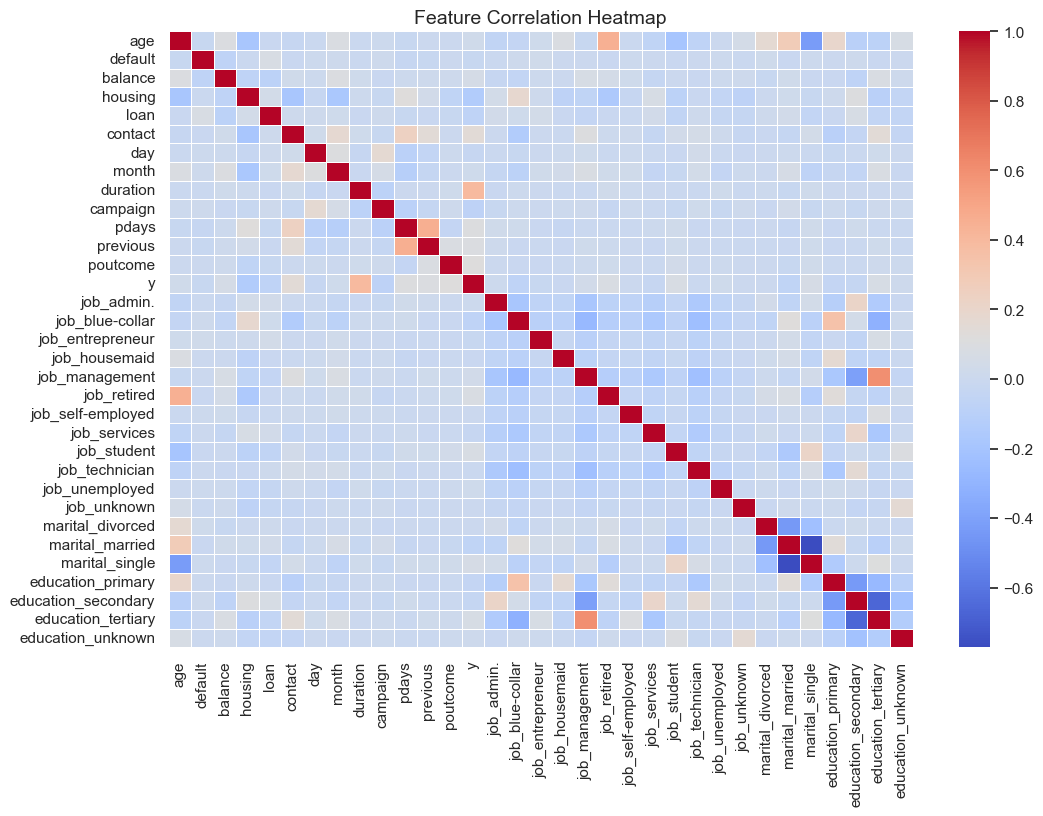

In [26]:
# Calculate the correlation coefficient matrix
corr_matrix = coded_df.corr()

# Set the graphics size
plt.figure(figsize=(12, 8))

# Draw a heat map
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)

# Set the title
plt.title("Feature Correlation Heatmap", fontsize=14)

# Display the image
plt.show()

# Feature Importance

## Train & Test Data Split

In [27]:
# Split features (X) and target variable (y)
# X = coded_df.drop(columns=["y"])
X = coded_df.drop(columns=["y","contact","day","month","duration","campaign","pdays","previous","poutcome"])
y = coded_df["y"]

# 80% training set, 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## XGBoost

In [39]:
# Convert data to DMatrix format (optional, but recommended for XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)

# Define the parameter grid for Grid Search
params = {
    'objective': 'binary:logistic',  # Suitable for binary classification tasks
    'eval_metric': 'logloss',  # Evaluation indicators
    'max_depth': 5,  # Default value, will be overridden in CV
    'eta': 0.1,  # Default value, will be overridden in CV
    'subsample': 0.8,  # Default value, will be overridden in CV
    'colsample_bytree': 0.8  # Default value, will be overridden in CV
}

# Perform Grid Search using XGBoost's CV function
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,  # Maximum number of boosting rounds
    nfold=5,  # Number of cross-validation folds
    metrics='logloss',  # Evaluation metric
    as_pandas=True,  # Return results as a pandas DataFrame
    seed=42,  # Random seed for reproducibility
    early_stopping_rounds=10  # Early stopping if no improvement
)

# Print the best number of boosting rounds
best_num_boost_rounds = cv_results.shape[0]
print(f"Best Number of Boosting Rounds: {best_num_boost_rounds}")

# Train the final model with the best number of boosting rounds
final_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=best_num_boost_rounds
)

# Predict using the final model
dtest = xgb.DMatrix(X_test)
y_pred_proba = final_model.predict(dtest)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {acc:.4f}")

Best Number of Boosting Rounds: 83
XGBoost Accuracy: 0.8790


In [42]:
# Defining the XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    objective="binary:logistic",  # Suitable for binary classification tasks
    eval_metric="logloss",  # Evaluation indicators
)

# model training
xgb_clf.fit(X_train, y_train)

# predict
y_pred = xgb_clf.predict(X_test)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuary: {acc:.4f}")

XGBoost Accuary: 0.8792


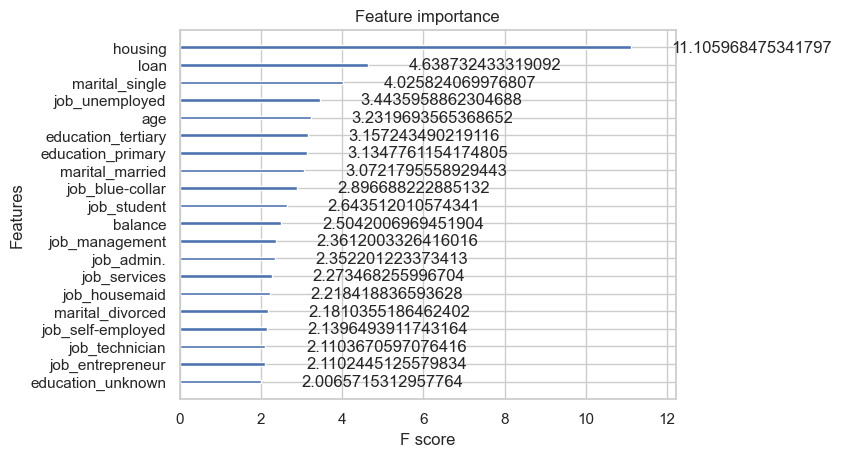

In [43]:
xgb.plot_importance(xgb_clf, importance_type="gain", max_num_features=20)  # top 20 features
plt.show()

 96%|=================== | 8718/9043 [00:16<00:00]       

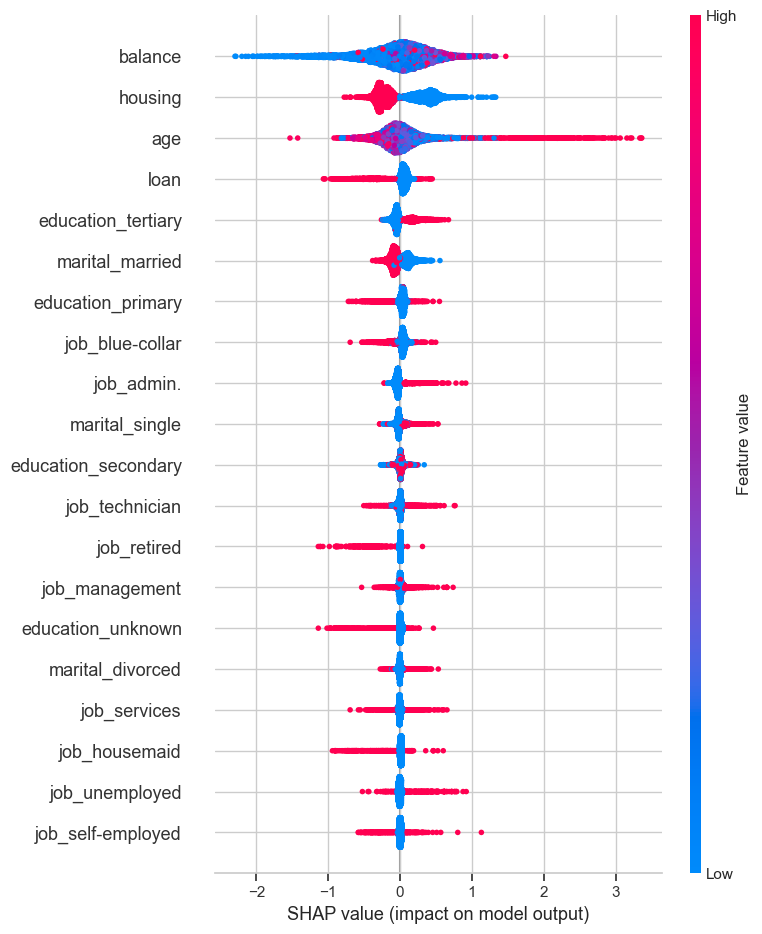

In [30]:
# Calculating SHAP Values
explainer = shap.Explainer(xgb_clf, X_train)
shap_values = explainer(X_test)

# Draw the overall impact
shap.summary_plot(shap_values, X_test)

**Vertical axis**: variable name (sorted by interaction SHAP importance).

**Horizontal axis**: interaction SHAP value (positive value indicates positive contribution to y=1, negative value indicates greater contribution to y=0).

**Color**: feature value size (red = larger value, blue = smaller value).

**Distribution of points**: The denser the points, the more stable the interaction effect of the feature.

## Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Defining the Random Forest classifier
rf_clf = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    max_depth=None,    # Maximum depth of each tree (None means no limit)
    min_samples_split=2,  # Minimum number of samples required to split a node
    min_samples_leaf=1,   # Minimum number of samples required at each leaf node
    random_state=42       # Random seed for reproducibility
)

# Model training
rf_clf.fit(X_train, y_train)

# Predict
y_pred = rf_clf.predict(X_test)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {acc:.4f}")

Random Forest Accuracy: 0.8735


In [35]:
feature_importances = pd.Series(rf_clf.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))

balance                0.569890
age                    0.298139
housing                0.025021
loan                   0.011716
education_secondary    0.006407
education_tertiary     0.006310
job_technician         0.006264
job_admin.             0.005777
marital_married        0.005620
job_blue-collar        0.005474
job_management         0.005342
marital_single         0.005326
job_retired            0.005109
education_primary      0.005041
job_student            0.004773
marital_divorced       0.004739
job_services           0.004504
job_self-employed      0.004319
job_unemployed         0.004183
education_unknown      0.004125
job_entrepreneur       0.003428
default                0.003357
job_housemaid          0.003221
job_unknown            0.001918
dtype: float64


## Logistic Regression

In [ ]:
# 2. Build a logistic regression pipeline
model = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, random_state=42,class_weight="balanced"))
])

# 3. Training the Model
model.fit(X_train, y_train)

# 4. Prediction
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# 5. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))

Accuracy: 0.6207010947694349
ROC AUC: 0.6751096058477353
              precision    recall  f1-score   support

           0       0.93      0.62      0.74      7952
           1       0.19      0.65      0.29      1091

    accuracy                           0.62      9043
   macro avg       0.56      0.63      0.52      9043
weighted avg       0.84      0.62      0.69      9043



In [32]:
# View features that influence ranking
feature_importance = model.named_steps["logreg"].coef_[0]
importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": feature_importance})
importance_df.sort_values(by="Importance", ascending=False, inplace=True)
print(importance_df)

                Feature  Importance
10          job_retired    0.141091
22   education_tertiary    0.097502
2               balance    0.096698
19       marital_single    0.091929
13          job_student    0.091635
5            job_admin.    0.047079
15       job_unemployed    0.043626
0                   age    0.031325
17     marital_divorced   -0.004211
9        job_management   -0.006505
23    education_unknown   -0.009118
11    job_self-employed   -0.010419
21  education_secondary   -0.013853
16          job_unknown   -0.022827
12         job_services   -0.023166
14       job_technician   -0.029943
8         job_housemaid   -0.037260
7      job_entrepreneur   -0.040368
1               default   -0.064766
6       job_blue-collar   -0.069060
18      marital_married   -0.081852
20    education_primary   -0.099247
4                  loan   -0.181618
3               housing   -0.351962


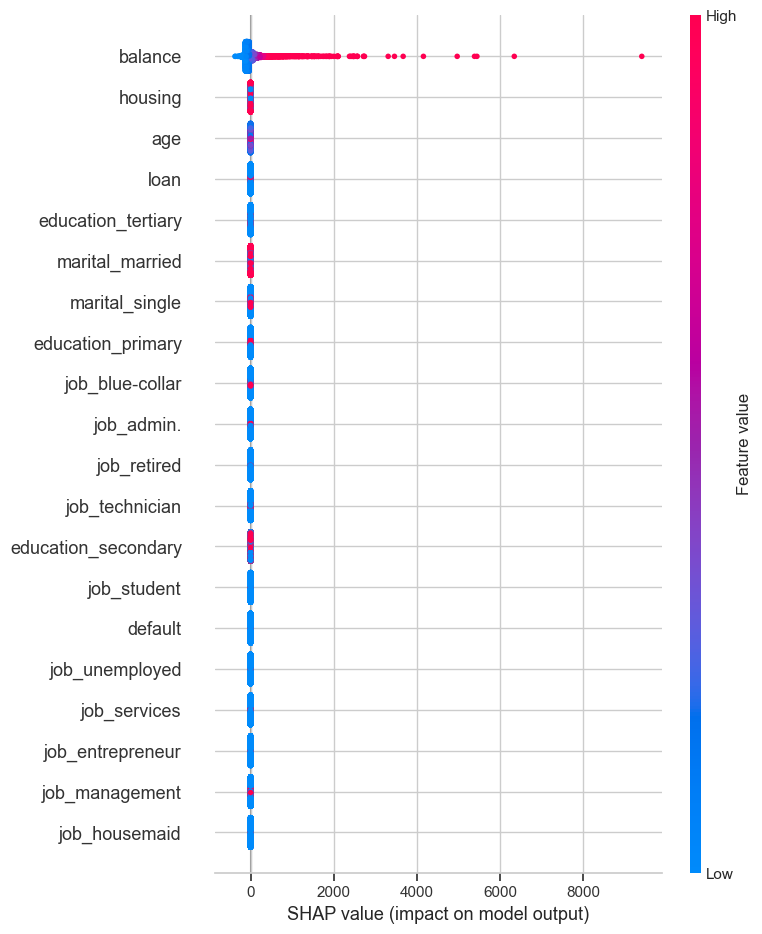

In [33]:
explainer = shap.LinearExplainer(model.named_steps["logreg"], X_train)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)
plt.show()